In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/hellraizer/fastai/courses/ml1/')
from fastai.imports import *
from fastai.structured import *

In [3]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [4]:
df_raw = customers.copy()

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [11]:
display_all(df_raw.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


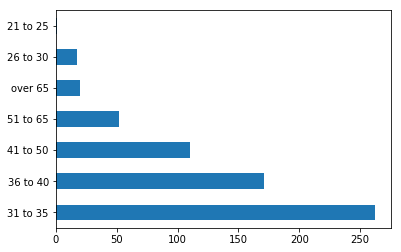

In [28]:
df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & 
((df_raw['AgeOfVehicle'] == '7 years') | (df_raw['AgeOfVehicle'] == '6 years') | 
 (df_raw['AgeOfVehicle'] == 'more than 7') | (df_raw['AgeOfVehicle'] == '5 years'))].value_counts().plot('barh')

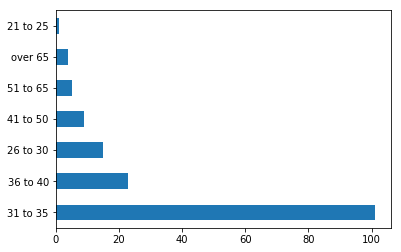

In [32]:
df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & 
((df_raw['AgeOfVehicle'] == '7 years') | (df_raw['AgeOfVehicle'] == '6 years') | 
(df_raw['AgeOfVehicle'] == 'more than 7') | (df_raw['AgeOfVehicle'] == '5 years'))
& (df_raw['MaritalStatus'] == 'Single')].value_counts().plot('barh')

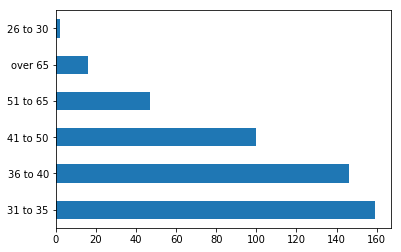

In [35]:
fig = (df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & 
((df_raw['AgeOfVehicle'] == '7 years') | (df_raw['AgeOfVehicle'] == '6 years') | 
(df_raw['AgeOfVehicle'] == 'more than 7') | (df_raw['AgeOfVehicle'] == '5 years'))
& (df_raw['MaritalStatus'] == 'Married')].value_counts().plot('barh')).get_figure()

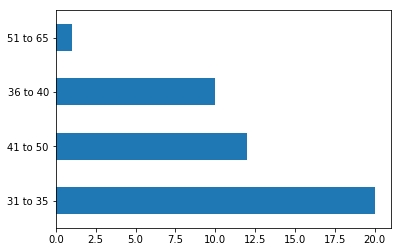

In [49]:
fig = (df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & 
((df_raw['AgeOfVehicle'] == '7 years') | (df_raw['AgeOfVehicle'] == '6 years') | 
(df_raw['AgeOfVehicle'] == 'more than 7') | (df_raw['AgeOfVehicle'] == '5 years'))
& (df_raw['MaritalStatus'] == '')& (df_raw['Sex'] == 'Female')].value_counts().plot('barh')).get_figure()

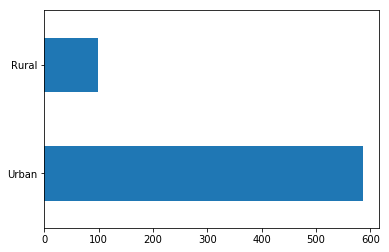

In [38]:
df_raw['AccidentArea'][df_raw['FraudFound_P'] == 1].value_counts().plot('barh')

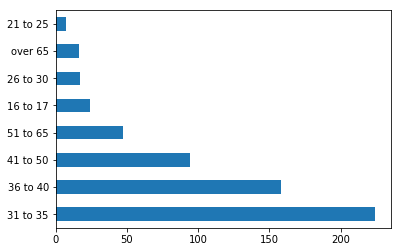

In [45]:
df_raw['AgeOfPolicyHolder'][(df_raw['FraudFound_P'] == 1) & (df_raw['AccidentArea'] == 'Urban')].value_counts().plot('barh')

In [18]:
df_raw['AgeOfVehicle'][(df_raw['FraudFound_P'] == 1)].value_counts()

7 years        260
6 years        165
more than 7    148
5 years         60
new             26
4 years         15
3 years          9
2 years          2
Name: AgeOfVehicle, dtype: int64